<a href="https://colab.research.google.com/github/Davidboga4/FaceRecognition/blob/master/Copy_of_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

For demonstration purpose, we'll synthetically generate some data and work with it.

We will generate "Regression data" using the [sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) method 

In [ ]:
# Dependencies

import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [ ]:
x, y = make_regression(n_samples=20, 
                       bias=50, 
                       n_features=1, 
                       n_targets=1, 
                       noise=4.0,
                       random_state=235)

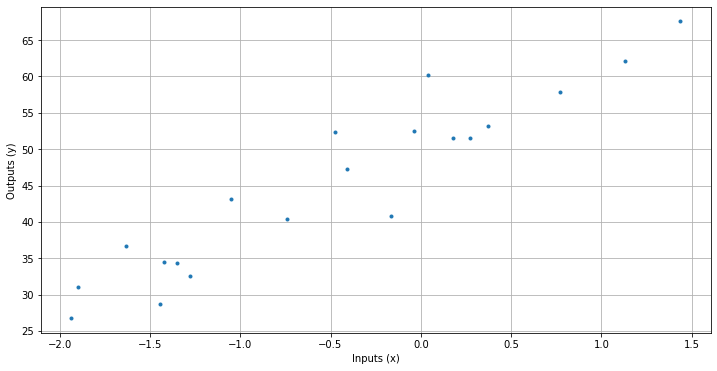

In [ ]:
# Visualizing the data

plt.plot(x, y, '.')

plt.xlabel('Inputs (x)')
plt.ylabel('Outputs (y)')
plt.grid(True)
plt.show()

# Task

Our Task is to build a regression model that takes `x` as input and predicts the correct values for `y`.

# Model

For the given data, we will be using the linear model that is shown below.

> $\hat{f}(x) = \theta_1x + \theta_0$

Here, $\theta_1$ and $\theta_0$ are parameters of the model that we need to find out.

---

Notice that, each parameter is a coefficient of an input variable.

*  $\theta_1$ is the coefficient of $x$
*  $\theta_0$ is included as bias(intercept) term and it can be thought as the coefficient of 1.

i.e.,
> $\hat{f}(x) = \theta_0 * 1 + \theta_1 * x$

---

One way to think about the parameters is... Each parameter signifies the weight(importance) of each feature value.

> $\hat{f}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3$

![weights](https://drive.google.com/uc?export=view&id=1Nfo-oWsLlXVSTl0UJBK-T3kujaFl5p6h)


In [ ]:
def linear_model(x, theta_0, theta_1):
                          #  theta_0 * 1 + theta_1 * x
  return np.sum(x * theta_1 + theta_0, axis=1)

# Loss function

Since our task is a regression task, we will be using `Mean Squared Error` as our loss function.

> $\mathcal{L}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n} (y-\hat{y})^2$

In [ ]:
def MSE(y, y_hat):
  return np.sum((y-y_hat)**2) / len(y)

# Learning Algorithm

## Gradient Descent

Gradient Descent is one of the popular learning algorithms that you're gonna use in Machine learning and Deep learning.


### Understanding Slopes and Derivatives



Consider the line, 

> $y = mx + c$

Lets assume, $c = 0$

> $y = mx$

Where, $m$ is the slope of the line

It has been taught in our schools that we can find out the slope of a line by calculating the first order derivative of $y$ with respect to $x$. 
i.e.,
> $  Slope, m = \frac{dy}{dx} $

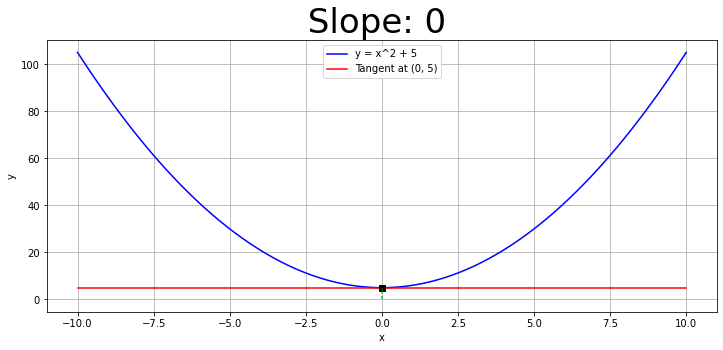

In [ ]:
#@title Interpreting slope
X = 0 #@param {type:"slider", min:-10, max:10, step:0.5}

plt.rcParams['figure.figsize'] = (12,5)

x = np.linspace(-10, 10, num=100)

def f(x):
  return x**2 + 5

def getSlopeSign(slope):
  if slope > 0:
    return 'Positive'
  elif slope < 0:
    return 'Negative'
  else: 
    return ''

# Plotting the curve
plt.plot(x, f(x), 'b-', label='y = x^2 + 5')

# Calculating the Slope and plotting Tangent
Y = f(X)
slope = 2 * X
tangent = slope * (x - X) + Y
plt.plot(x, tangent, 'r-', label='Tangent at ({}, {})'.format(X, Y))
plt.plot(X, Y, 's', color='black')


# Plotting the grid lines
plt.plot([X, X], [Y, 0], 'g--', alpha=0.7)
plt.plot([X, 0], [Y, Y], 'g--', alpha=0.7)

plt.figtext(.5,.9,'{} Slope: {}'.format(getSlopeSign(slope), slope), fontsize=34, ha='center')
# plt.title(, )
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Animation

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (12,6)


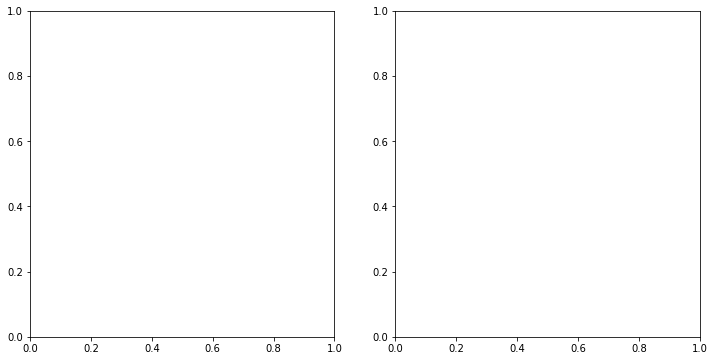

In [ ]:
fig = None
ax1 = None
ax2 = None
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

In [ ]:
#@title Plotting Loss functions by changing the parameter values
x, y = make_regression(n_samples=10,  noise=1.0 , n_features=1, n_targets=1, random_state=42, bias=10)


ms = np.linspace(-40, 80, 195)
c = 10

ax1.scatter(x, y, c='blue', label='Data')
model, = ax1.plot([], [], 'r-', label='y=mx+c')
loss, = ax2.plot([], [], 'r-', label='Loss Function (MSE)')
plots = [model, loss]

def init():
  fig.suptitle('Tracking the Loss function for various values of "m"')
  ax1.set_xlim([-0.6, 0.9])
  ax1.set_ylim([-1, 25])
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.grid()

  ax2.set_xlim([-40, 80])
  ax2.set_ylim([-200, 2600])
  ax2.set_xlabel('Values for slope')
  ax2.set_ylabel('Loss Value')
  ax2.grid()

  plots[0].set_data([], [])
  plots[1].set_data([], [])

  ax1.legend(loc='upper left')
  ax2.legend(loc='upper left')

  return plots

def data_gen():
  i = 0
  slope_data = []
  mloss_data = []
  y_hats = [] 
  while i < 195:
    m = ms[i]
    y_hat = m*x + c
    mse = mean_squared_error(y, y_hat)

    slope_data.append(m)
    mloss_data.append(mse)
    y_hats.append(y_hat)
    i += 1
  return np.array(slope_data), np.array(mloss_data), y_hats

slopes, mlosses, y_hats = data_gen()

def run(i):
  plots[0].set_data(x, y_hats[i])
  plots[1].set_data(slopes[:i+1], mlosses[:i+1])

  return plots

anim = animation.FuncAnimation(fig, 
                               func=run, 
                               init_func=init, 
                               interval=100, 
                               frames=195, 
                               blit=True)

HTML(anim.to_html5_video())

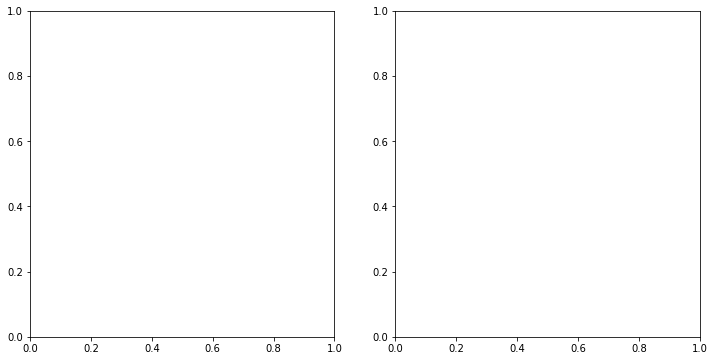

In [ ]:
del fig
del ax1
del ax2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

In [ ]:
#@title Plotting Loss functions by changing the parameter values


m = 18
cs = np.linspace(-20, 40, 195)

ax1.scatter(x, y, c='blue', label='Data')
model, = ax1.plot([], [], 'r-', label='y=mx+c')
loss, = ax2.plot([], [], 'r-', label='Loss Function (MSE)')
plots = [model, loss]

def init():
  fig.suptitle('Tracking the Loss function for various values of "c"')
  ax1.set_xlim([-0.6, 0.9])
  ax1.set_ylim([-25, 45])
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.grid()

  ax2.set_xlim([-25, 45])
  ax2.set_ylim([-100, 1000])
  ax2.set_xlabel('Values for Intercept')
  ax2.set_ylabel('Loss Value')
  ax2.grid()

  plots[0].set_data([], [])
  plots[1].set_data([], [])

  ax1.legend(loc='upper left')
  ax2.legend(loc='upper left')

  return plots

def data_gen():
  i = 0
  bias_data = []
  loss_data = []
  y_hats = [] 
  while i < 195:
    c = cs[i]
    y_hat = m*x + c
    mse = mean_squared_error(y, y_hat)

    bias_data.append(c)
    loss_data.append(mse)
    y_hats.append(y_hat)
    i += 1
  return np.array(bias_data), np.array(loss_data), y_hats

biases, losses, y_hats = data_gen()

# print(max(losses), min(losses))

def run(i):
  plots[0].set_data(x, y_hats[i])
  plots[1].set_data(biases[:i+1], losses[:i+1])

  return plots

anim = animation.FuncAnimation(fig, 
                               func=run, 
                               init_func=init, 
                               interval=100, 
                               frames=195, 
                               blit=True)

HTML(anim.to_html5_video())

When you plot the values for the Loss function for all the possible values of parameters, it will sometimes look like the figure on the left.

> X-axis: $\theta_0$ <br> Y-axis: $\theta_1$ <br> Z-axis: $\mathcal{L}$

![Parameters vs Loss](https://blog.paperspace.com/content/images/size/w2000/2018/05/convex_cost_function.jpg)


## Implementation

### Step 1
---
> Initialize the parameters with random values.

Randomly initializing the parameter, 
$m = -20$


Slope of Loss function at param_m = -17, is -147.08127951427483 (Negative)


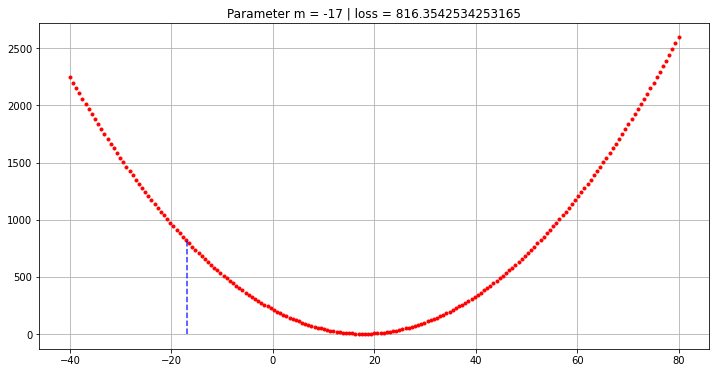

In [ ]:
#@title Finding the value for m
param_m = -5 #@param {type:"slider", min:-20, max:25, step:1}
m = param_m
c = 10
curr_loss = mean_squared_error(y, m*x+c)

'''
(y-mx-c)**2

-2(y-mx-c)*x
'''
loss_fn_slope = -1 * np.sum((y - m*x - c) * x)/len(x)

def get_sign(loss_fn_slope):
  if loss_fn_slope > 0:
    return 'Positive'
  elif loss_fn_slope < 0:
    return 'Negative'
  else:
    return 'Zero'

print('Slope of Loss function at param_m = {}, is {} ({})'.format(m, loss_fn_slope, get_sign(loss_fn_slope)))

plt.plot(ms, mlosses, 'r.', label='Loss function')
plt.plot((m, m), (0, curr_loss), '--b', alpha=0.8)
plt.title('Parameter m = {} | loss = {}'.format(m, curr_loss))
plt.grid()
plt.show()


### Step 2
---
> Find the loss and update the parameters value in the opposite direction of the `slope of the loss function (gradient of loss function)`.

> `Algorithm`<br>
![alt text](https://image.slidesharecdn.com/anoverviewofgradientdescentoptimizationalgorithms-170414055411/95/an-overview-of-gradient-descent-optimization-algorithms-6-638.jpg?cb=1492149859)

Gradient Descent in action

![alt text](https://donsoft.io/deep-learning-with-rnns/images/gradient_descent_cropped.gif)

![Gradient](https://drive.google.com/uc?export=view&id=18InDJr_Leim8ButuXEqCewinicINCpjx)

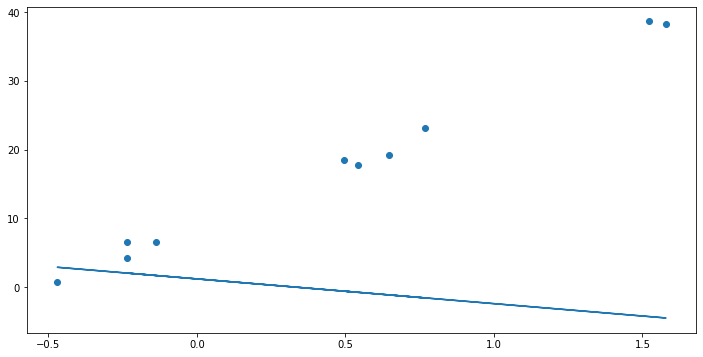

In [ ]:
theta_0, theta_1 = 1.2, -3.6

y_hat = linear_model(x, theta_0, theta_1)

plt.scatter(x, y)
plt.plot(x, y_hat)
plt.show()

In [ ]:
print(x.shape, y.shape)

def gradient_MSE(y, y_hat):
  grad_theta_1 = -2 * np.sum((y - y_hat) * x) / len(y)
  grad_theta_0 = -2 * np.sum((y - y_hat) * 1) / len(y)
  return grad_theta_0, grad_theta_1
                           # Parameters      # Hyperparameters
def gradient_descent(x, y, theta_0, theta_1, epochs=40, eta=0.03):
  hist = {'loss': []}
  
  for i in range(epochs):
    y_hat = linear_model(x, theta_0, theta_1)
    curr_loss = MSE(y, y_hat)
    hist['loss'].append(curr_loss)

    grad_theta_0, grad_theta_1 = gradient_MSE(y, y_hat)

    theta_0 = theta_0 - eta * grad_theta_0
    theta_1 = theta_1 - eta * grad_theta_1
  
  return theta_0, theta_1, hist

# Training
theta_0, theta_1, hist = gradient_descent(x, y, theta_0, theta_1)

(10, 1) (10,)


In [ ]:
print(theta_0, theta_1)

7.107005681904061 22.866995326448034


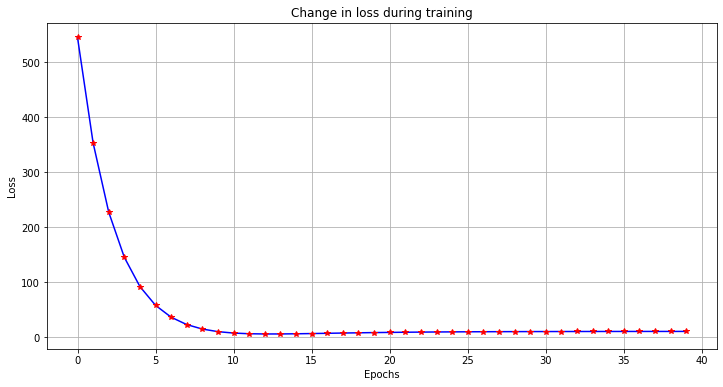

In [ ]:
plt.plot(hist['loss'], 'b-')
plt.plot(hist['loss'], 'r*')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Change in loss during training')
plt.show()

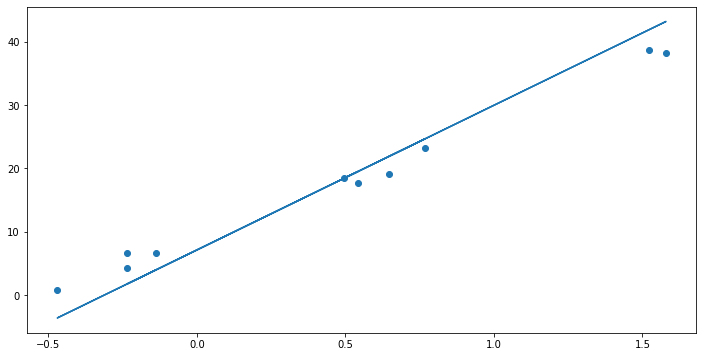

In [ ]:
y_hat = linear_model(x, theta_0, theta_1)

plt.scatter(x, y)
plt.plot(x, y_hat)
plt.show()